In [6]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Eğitim verisi boyutu:", train.shape)
print("Test verisi boyutu:", test.shape)
print("\nilk 5 satir:")
train.head()

Eğitim verisi boyutu: (8693, 14)
Test verisi boyutu: (4277, 13)

ilk 5 satir:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
print("Sutunlar:", train.columns.tolist())
print("\neksik degerler:")
print(train.isnull().sum())
print("\nhedef degisken dagilimi:")
print(train['Transported'].value_counts())

Sutunlar: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']

eksik degerler:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

hedef degisken dagilimi:
Transported
True     4378
False    4315
Name: count, dtype: int64


In [8]:
y_train = train['Transported']

train_ids = train['PassengerId']
test_ids = test['PassengerId']

feature_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X_train = train[feature_cols].copy()
X_test = test[feature_cols].copy()

print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)


X_train boyutu: (8693, 10)
X_test boyutu: (4277, 10)


In [9]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train[numeric_cols] = X_train[numeric_cols].fillna(0)
X_test[numeric_cols] = X_test[numeric_cols].fillna(0)

categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
X_train[categorical_cols] = X_train[categorical_cols].fillna('Unknown')
X_test[categorical_cols] = X_test[categorical_cols].fillna('Unknown')

print("eksik degerler kaldi mi?", X_train.isnull().sum().any)

eksik degerler kaldi mi? <bound method Series.any of HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64>


In [10]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()

    # Ensure all values are strings before concatenation and encoding
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    combined = pd.concat([X_train[col], X_test[col]])
    le.fit(combined)

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

print("Kategorik degiskenler sayisala cevrildi")
print(X_train.head())

Kategorik degiskenler sayisala cevrildi
   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  
0           0.0     0.0     0.0  
1          25.0   549.0    44.0  
2           0.0  6715.0    49.0  
3         371.0  3329.0   193.0  
4         151.0   565.0     2.0  


In [11]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.1,random_state = 42)

print("model egitiliyor...")
model.fit(X_train, y_train)
print("model egitimi tamamlandi")

train_accuracy = model.score(X_train, y_train)
print(f"Egitim Dogruluk Orani: {train_accuracy:.4f}")

model egitiliyor...
model egitimi tamamlandi
Egitim Dogruluk Orani: 0.8222


In [12]:
predictions = model.predict(X_test)

predictions_bool = predictions.astype(bool)

print(f"Toplam tahmin: {len(predictions)}")
print(f"True tahminler: {predictions_bool.sum()}")
print(f"False tahminler: {(~predictions_bool).sum()}")

Toplam tahmin: 4277
True tahminler: 2333
False tahminler: 1944


In [13]:
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Transported': predictions_bool
})


submission.to_csv('my_first_submission.csv', index=False)

print("Submission dosyasi olusturuldu!")
print(submission.head())

Submission dosyasi olusturuldu!
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')

print("Cabin örnekleri:")
print(train['Cabin'].head(10))

Cabin örnekleri:
0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object


In [15]:
def split_cabin(cabin):
    if pd.isna(cabin):
        return 'Unknown', 0, 'Unknown'
    parts = cabin.split('/')
    return parts[0], int(parts[1]), parts[2]


train[['Deck', 'Num', 'Side']] = train['Cabin'].apply(
    lambda x: pd.Series(split_cabin(x))
)


test = pd.read_csv('test.csv')
test[['Deck', 'Num', 'Side']] = test['Cabin'].apply(
    lambda x: pd.Series(split_cabin(x))
)

print("Yeni ozellikler eklendi!")
print(train[['Cabin', 'Deck', 'Num', 'Side']].head())

Yeni ozellikler eklendi!
   Cabin Deck  Num Side
0  B/0/P    B    0    P
1  F/0/S    F    0    S
2  A/0/S    A    0    S
3  A/0/S    A    0    S
4  F/1/S    F    1    S


In [16]:
def extract_group(passenger_id):
    return passenger_id.split('_')[0]

train['Group'] = train['PassengerId'].apply(extract_group)
test['Group'] = test['PassengerId'].apply(extract_group)


group_size = train.groupby('Group').size()
train['GroupSize'] = train['Group'].map(group_size)
test['GroupSize'] = test['Group'].map(test.groupby('Group').size())

print("Grup buyuklukleri:")
print(train['GroupSize'].value_counts().head())

Grup buyuklukleri:
GroupSize
1    4805
2    1682
3    1020
4     412
5     265
Name: count, dtype: int64


In [17]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['TotalSpending'] = train[spending_cols].sum(axis=1)
test['TotalSpending'] = test[spending_cols].sum(axis=1)


train['NoSpending'] = (train['TotalSpending'] == 0).astype(int)
test['NoSpending'] = (test['TotalSpending'] == 0).astype(int)

print("Harcama ozellikleri eklendi")
print(f"Hiç harcama yapmayan: {train['NoSpending'].sum()} kişi")

Harcama ozellikleri eklendi
Hiç harcama yapmayan: 3653 kişi


In [18]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 30:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

train['AgeCategory'] = train['Age'].apply(categorize_age)
test['AgeCategory'] = test['Age'].apply(categorize_age)

print(train['AgeCategory'].value_counts())

AgeCategory
Young      3375
Adult      2783
Child      1545
Senior      811
Unknown     179
Name: count, dtype: int64


In [19]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


y_train = train['Transported']


feature_cols = [
    'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
    'Deck', 'Num', 'Side',
    'GroupSize',
    'TotalSpending',
    'NoSpending',
    'AgeCategory'
]

X_train = train[feature_cols].copy()
X_test = test[feature_cols].copy()


numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                'Num', 'GroupSize', 'TotalSpending']
X_train[numeric_cols] = X_train[numeric_cols].fillna(0)
X_test[numeric_cols] = X_test[numeric_cols].fillna(0)

categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                    'Deck', 'Side', 'AgeCategory']
X_train[categorical_cols] = X_train[categorical_cols].fillna("Unknown")
X_test[categorical_cols] = X_test[categorical_cols].fillna("Unknown")


for col in categorical_cols:
    le = LabelEncoder()
    # Ensure all values are strings before concatenation and encoding
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    combined = pd.concat([X_train[col], X_test[col]])
    le.fit(combined)
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("Model eğitiliyor...")
model.fit(X_train, y_train)
print("Tamamlandı!")


predictions = model.predict(X_test)


submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions.astype(bool)
})

submission.to_csv('submission_v2.csv', index=False)
print("submission_v2.csv oluşturuldu!")

Model eğitiliyor...
Tamamlandı!
submission_v2.csv oluşturuldu!


<Figure size 1000x800 with 0 Axes>

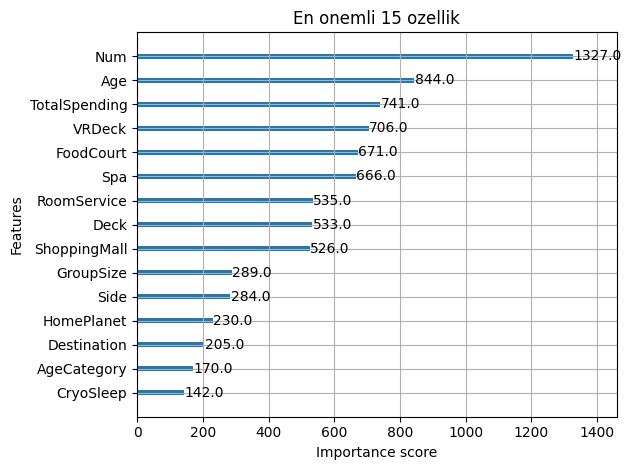

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=15)
plt.title("En onemli 15 ozellik")
plt.tight_layout()
plt.show()

In [21]:
!pip install optuna -q

In [22]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb



def evaluate_model(params):
    model = xgb.XGBClassifier(
        **params,
        random_state=42,
        eval_metric='logloss'
    )


    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )

    return scores.mean()


current_params = {
    'n_estimators': 200,
    'max_depth': 6,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

current_score = evaluate_model(current_params)
print(f"su anki CV score: {current_score:.5f}")

su anki CV score: 0.78466


In [23]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }

    score = evaluate_model(params)
    return score


print("Optimizasyon basliyor... (3-5 dakika surebilir)")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

study.optimize(
    objective,
    n_trials=50,
    show_progress_bar=True
)

print("\nOptimizasyon tamamlandi")
print(f"En iyi CV score: {study.best_value:.5f}")
print(f"En iyi parametreler:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2026-02-12 11:43:40,927] A new study created in memory with name: no-name-6dfdcc4f-b25a-4214-94e6-df68f2ccdc57


Optimizasyon basliyor... (3-5 dakika surebilir)


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-12 11:44:02,573] Trial 0 finished with value: 0.7795992035421069 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973}. Best is trial 0 with value: 0.7795992035421069.
[I 2026-02-12 11:44:12,770] Trial 1 finished with value: 0.7793683260421747 and parameters: {'n_estimators': 447, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'min_child_weight': 9, 'gamma': 1.0616955533913808}. Best is trial 0 with value: 0.7795992035421069.
[I 2026-02-12 11:44:13,876] Trial 2 finished with value: 0.7923666167943033 and parameters: {'n_estimators': 172, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'min_child_weight': 3, 'gamma': 3.0592644736118975}. Best is trial 2 with v

In [24]:
best_params = study.best_params
best_params['random_state'] = 42
best_params['eval_metric'] = 'logloss'

print("En iyi parametrelerle model egitiliyor...")


final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)


predictions = final_model.predict(X_test)


submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions.astype(bool)
})

submission.to_csv('submission_v3_optimized.csv', index=False)
print("submission_v3_optimized.csv oluşturuldu!")

En iyi parametrelerle model egitiliyor...
submission_v3_optimized.csv oluşturuldu!


In [25]:
import xgboost as xgb

model_v2 = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


model_v3 = xgb.XGBClassifier(
    **study.best_params,
    random_state=42
)


print("Model v2 eğitiliyor...")
model_v2.fit(X_train, y_train)

print("Model v3 eğitiliyor...")
model_v3.fit(X_train, y_train)


pred_v2 = model_v2.predict_proba(X_test)[:, 1]
pred_v3 = model_v3.predict_proba(X_test)[:, 1]


pred_ensemble = (pred_v2 + pred_v3) / 2
pred_final = (pred_ensemble > 0.5).astype(bool)


submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': pred_final
})

submission.to_csv('submission_v4_ensemble.csv', index=False)
print("Ensemble submission oluşturuldu!")

Model v2 eğitiliyor...
Model v3 eğitiliyor...
Ensemble submission oluşturuldu!


In [26]:
!pip install lightgbm -q

import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("LightGBM eğitiliyor...")
model_lgb.fit(X_train, y_train)


pred_lgb = model_lgb.predict_proba(X_test)[:, 1]


pred_ensemble_3 = (pred_v2 + pred_v3 + pred_lgb) / 3
pred_final_3 = (pred_ensemble_3 > 0.5).astype(bool)


submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': pred_final_3
})

submission.to_csv('submission_v5_ensemble_3models.csv', index=False)
print("3-model ensemble submission oluşturuldu!")

LightGBM eğitiliyor...
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit